<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
df.shape


(65437, 114)

In [4]:
pd.set_option('display.max_columns', None)


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [5]:
## Write your code here
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [6]:
df.columns


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [7]:
## Write your code here
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [8]:
df['Employment'].isnull().sum()


np.int64(0)

In [9]:
df['JobSat'].isnull().sum()


np.int64(36311)

In [10]:
df['YearsCodePro'].isnull().sum()


np.int64(13827)

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [11]:
## Write your code here
df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

In [12]:
df['JobSat'].value_counts()


JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64

In [13]:
df['YearsCodePro'].value_counts()


YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34                     169
38                     134
33             

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


In [14]:
## Write your code here
# JobSat has 36311 missing value. Create a new df which dropping missing value from JobSat for any further analysis with JobSat
df_jobsat = df.dropna(subset='JobSat')
df_jobsat['JobSat'].value_counts()

JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64

In [15]:
df_jobsat['JobSat'].isnull().sum() #check whether missing is dropped or not


np.int64(0)

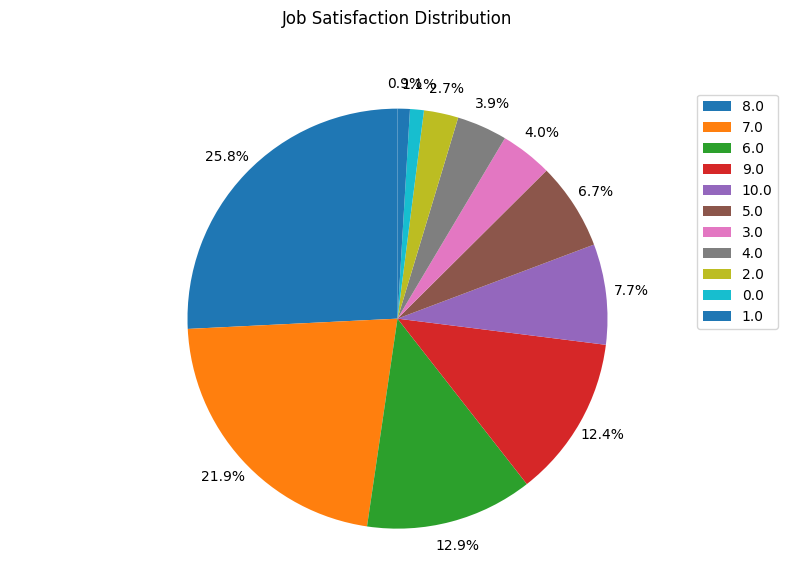

In [16]:
jobsat_count = df_jobsat['JobSat'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(jobsat_count, labels=None, autopct='%1.1f%%', pctdistance= 1.12
        , startangle=90)
plt.title('Job Satisfaction Distribution', y = 1.12)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=jobsat_count.index, loc='upper right')
plt.show()

In [17]:
# most of the reponsdents are satisfied with their job, based on high proportion of grade 6, 7, 8, 9; especially grade 7 and 8. 
#Only a very small number of respndent does not satisfied with their job

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [18]:
## Write your code here
df['LanguageHaveWorkedWith'].isnull().sum()

np.int64(5692)

In [19]:
df['LanguageWantToWorkWith'].isnull().sum()

np.int64(9685)

In [20]:
#since these 2 columns contain multiple choice with many entries, can not fill na. 
#Drop all missing data from these 2 colmuns
df_language = df.dropna(subset=['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])
# too many value in these 2 columns is considered unrealiable, therefore, set maximum to 5 language
# create new column to count distinguish entries in LanguageHaveWorkedWith
df_language = df_language.copy()
df_language['LanguageHaveWorkedWith_count'] = df_language['LanguageHaveWorkedWith'].str.split(';').str.len()
# Filter the DataFrame to keep only entries with a count below the threshold, 5
df_language = df_language[df_language['LanguageHaveWorkedWith_count']<=5]
# similarly for LanguageWantToWorkWith
df_language = df_language.copy()
df_language['LanguageWantToWorkWith_count'] = df_language['LanguageWantToWorkWith'].str.split(';').str.len()
df_language = df_language[df_language['LanguageWantToWorkWith_count']<=5]
from collections import Counter
!pip install matplotlib-venn
from matplotlib_venn import venn2

  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 178.2 MB/s eta 0:00:0000:01
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=b734488e0890ab006ac1216f3456fe28ed592aa19bc202517bde1ccd4549d3c2
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn


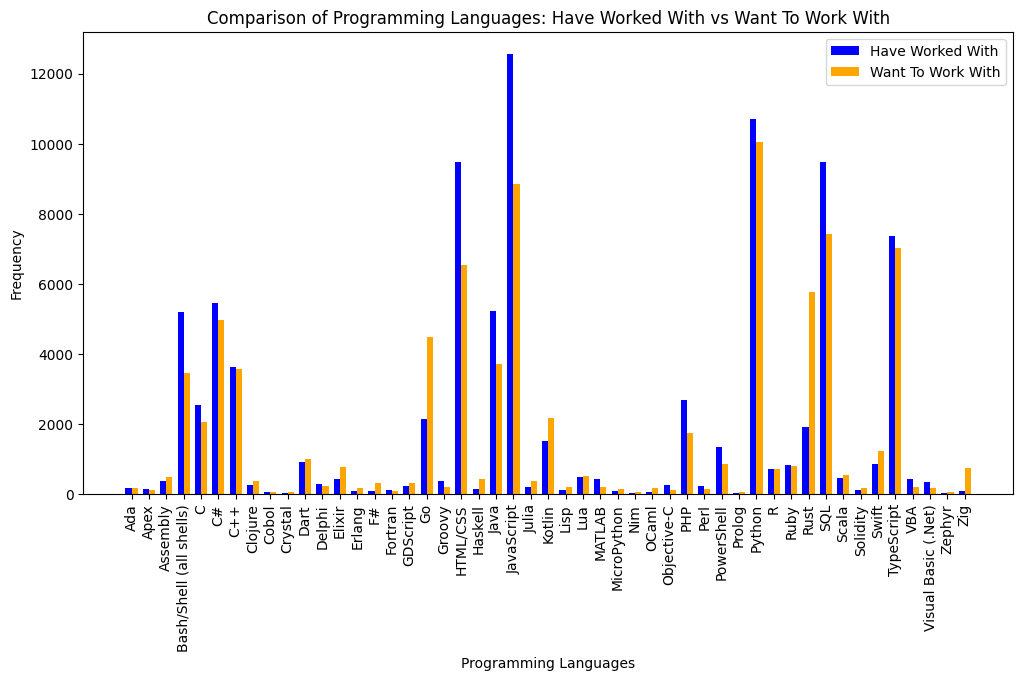

In [21]:
# Count the frequency of languages in both columns
have_worked_counts = Counter(df_language['LanguageHaveWorkedWith'].str.split(';').explode().str.strip())
want_work_counts = Counter(df_language['LanguageWantToWorkWith'].str.split(';').explode().str.strip())
# Convert to DataFrames for easier plotting
have_worked_df = pd.DataFrame(have_worked_counts.items(), columns=['Language', 'HaveWorkedCount'])
want_work_df = pd.DataFrame(want_work_counts.items(), columns=['Language', 'WantToWorkCount'])
# Merge the two DataFrames on Language
merged_df = pd.merge(have_worked_df, want_work_df, on='Language', how='outer').fillna(0)
# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(merged_df))

plt.bar(x, merged_df['HaveWorkedCount'], width=bar_width, label='Have Worked With', color='blue')
plt.bar([i + bar_width for i in x], merged_df['WantToWorkCount'], width=bar_width, label='Want To Work With', color='orange')

plt.xlabel('Programming Languages')
plt.ylabel('Frequency')
plt.title('Comparison of Programming Languages: Have Worked With vs Want To Work With')
plt.xticks([i + bar_width / 2 for i in x], merged_df['Language'], rotation=90)
plt.legend()
plt.show()

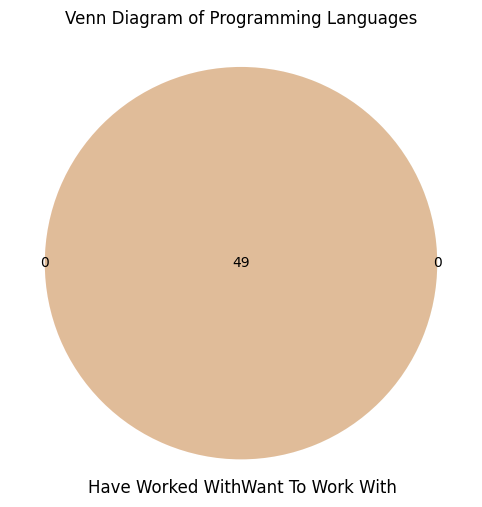

In [22]:
# Create sets for the Venn diagram
have_worked_set = set(have_worked_counts.keys())
want_work_set = set(want_work_counts.keys())

# Plotting the Venn diagram
plt.figure(figsize=(6,6))
venn2([have_worked_set, want_work_set], ('Have Worked With', 'Want To Work With'))
plt.title('Venn Diagram of Programming Languages')
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [23]:
## Write your code here
df['RemoteWork'].isnull().sum()

np.int64(10631)

In [24]:
df['RemoteWork_fill'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])
df['RemoteWork_fill'].value_counts()

RemoteWork_fill
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

In [25]:
!pip install pycountry-convert
import pycountry_convert as pc
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 152.7 MB/s eta 0:00:00


In [26]:
df['Country_new'] = df['Country'].replace({"Iran, Islamic Republic of...": "Iran", 
                                                                   "Venezuela, Bolivarian Republic of...":"Venezuela",
                                                                   "Palestine":"Palestine, State of",
                                                                   "Republic of Korea" : "Korea, Republic of",
                                                                   "South Korea" : "Korea, Republic of",
                                                                   "North Korea" : "Korea, Democratic People's Republic of",
                                                                   "Hong Kong (S.A.R.)" : "Hong Kong",
                                                                   "Cape Verde" : "Cabo Verde",
                                                                   "Congo, Republic of the..." : "Congo",
                                                                   "Democratic Republic of the Congo" : "Congo, The Democratic Republic of the",
                                                                   "Swaziland" : "Eswatini",
                                                                   "Micronesia, Federated States of..." : "Micronesia, Federated States of",
                                                                   "Libyan Arab Jamahiriya" : "Libya"
                                                                  })
df_country = df.dropna(subset='Country_new')
df_country = df_country.copy()
def coun_to_con(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return 'Unknown'
df_country['Continent'] = df_country['Country_new'].apply(coun_to_con)
df_country['Continent'].value_counts()

Continent
Europe           28561
North America    13879
Asia             10486
South America     2441
Africa            1837
Oceania           1665
Unknown             61
Name: count, dtype: int64

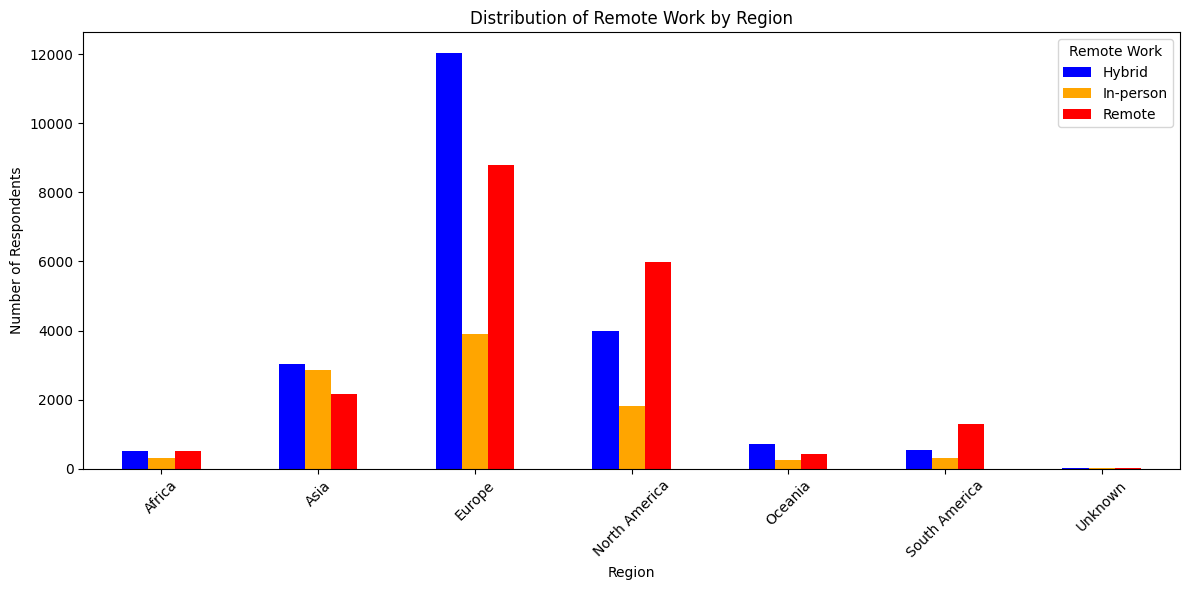

In [27]:
# Group by Region and RemoteWork, then count occurrences
remote_work_distribution = df_country.groupby(['Continent', 'RemoteWork']).size().unstack(fill_value=0)
remote_work_distribution.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange', 'red'])
plt.title('Distribution of Remote Work by Region')
plt.xlabel('Region')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Remote Work', labels=['Hybrid', 'In-person', 'Remote'])
plt.tight_layout()
plt.show()

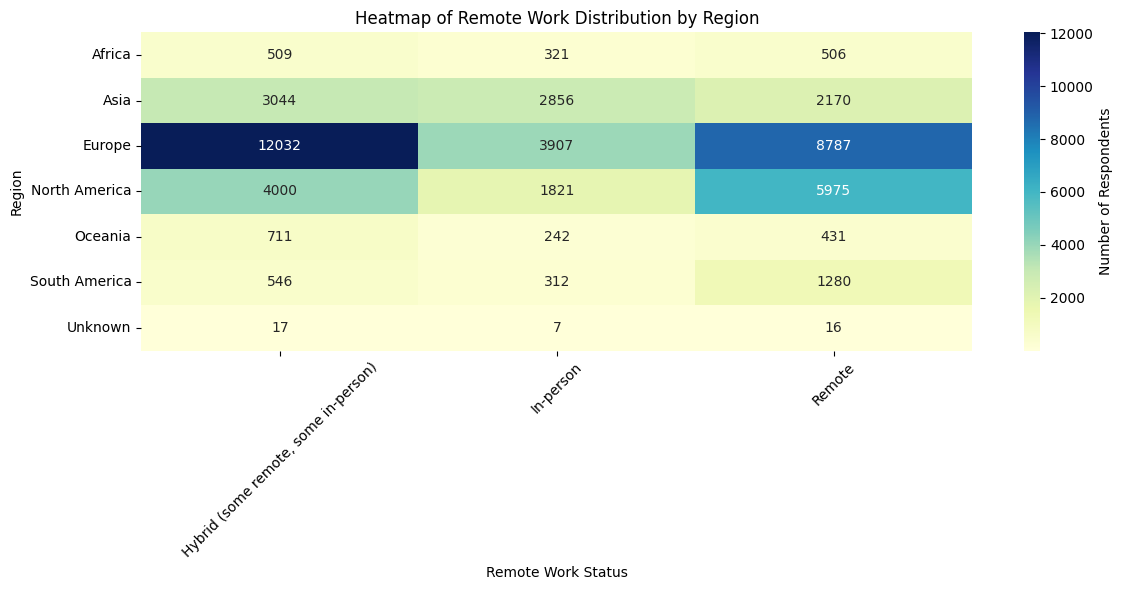

In [28]:
# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(remote_work_distribution, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Number of Respondents'})

plt.title('Heatmap of Remote Work Distribution by Region')
plt.xlabel('Remote Work Status')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [38]:
## Write your code here
df['JobSat'].isnull().sum()

np.int64(36311)

In [39]:
# too many missing value, better drop these missing for further analysis
df_jobsat = df.dropna(subset='JobSat')
df_jobsat['JobSat'].isnull().sum()

np.int64(0)

In [40]:
df_jobsat['YearsCodePro'].isnull().sum()

np.int64(770)

In [41]:
df_jobsat['YearsCodePro'].value_counts()
df_jobsat = df_jobsat.copy()
df_jobsat['YearsCodePro'] = df_jobsat['YearsCodePro'].replace({'Less than 1 year':'0.5', 
                                                               'More than 50 years':'51'})
df_jobsat['YearsCodePro_new'] = df_jobsat['YearsCodePro'].fillna(df_jobsat['YearsCodePro'].astype('float').mean())
df_jobsat['YearsCodePro_new'].isnull().sum()

np.int64(0)

In [42]:
df_jobsat['JobSat'].astype('float')

10        8.0
12        8.0
15        5.0
18       10.0
20        6.0
         ... 
65178     8.0
65241     5.0
65265     8.0
65351     8.0
65412     8.0
Name: JobSat, Length: 29126, dtype: float64

In [43]:
from scipy.stats import pearsonr, spearmanr

In [45]:
df_jobsat['JobSat'] = pd.to_numeric(df_jobsat['JobSat'], errors='coerce')
df_jobsat['YearsCodePro_new'] = pd.to_numeric(df_jobsat['YearsCodePro_new'], errors='coerce')


In [46]:
# Calculate Pearson correlation
pearson_corr, pearson_p_value = pearsonr(df_jobsat['JobSat'], df_jobsat['YearsCodePro_new'])

# Display the results
print(f"Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")

Pearson Correlation: 0.10213283472274262, p-value: 2.2097562938210842e-68


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [ ]:
## Write your code here
df['EdLevel'].isnull().sum()

In [ ]:
# EdLevel have too many entry, therefore better drop missing value
# Employment has no missing value
df_edu = df.dropna(subset='EdLevel')
df_edu = df_edu.copy()
education_map = {"Bachelor’s degree (B.A., B.S., B.Eng., etc.)" : "Bachelor’s degree",
                 "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)" : "Master's degree",
                 "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)" : "Secondary school",
                 "Professional degree (JD, MD, Ph.D, Ed.D, etc.)" : "Professional degree",
                 "Associate degree (A.A., A.S., etc.)" : "Associate degree",
                "Some college/university study without earning a degree" : "College/university (no degree)"}
df_edu['EdLevel_new'] = df_edu['EdLevel'].replace(education_map)
# Step 1: create a conflict group, if there are 2 or more values in the same set {} it means a conflict group - invalid data.
conflict_groups = [{'Employed, full-time', 
                    'Employed, part-time', 
                    'Retired', 
                    'Not employed, but looking for work', 
                    'Not employed, and not looking for work',
                    'Independent contractor, freelancer, or self-employed'},
                   {'Student, full-time',
                    'Student, part-time',
                    'Retired',
                    'Not employed, but looking for work',
                    'Not employed, and not looking for work'},
                  ]
# Step 2: Create a function to detect contradictions
def has_conflict(entry):
    if pd.isna(entry):
        return False
    parts = set(map(str.strip, entry.split(';')))
    for group in conflict_groups:
        if len(parts.intersection(group)) > 1:
            return True  # There is more than 1 value in the same conflicting group.
    return False
df_edu_emp = df_edu[~df_edu['Employment'].apply(has_conflict)] # The ~ sign means 'opposite' → keep only the lines that do not have contradictions.
df_edu_emp = df_edu_emp.copy()
# Step 1: Merge into a string
df_edu_emp['Employment_str'] = df_edu_emp['Employment'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
# Step 2: Perform the replacement
df_edu_emp['Employment_str'] = df_edu_emp['Employment_str'].replace({
    "Student, full-time;Employed, part-time": "Employed, part-time",
    "Employed, full-time;Student, full-time": "Employed, full-time",
    "Employed, full-time;Student, part-time": "Employed, full-time",
    "Student, part-time;Employed, part-time": "Employed, part-time",
    "Student, full-time;Independent contractor, freelancer, or self-employed": "Ind_free_self",
    "Independent contractor, freelancer, or self-employed;Student, part-time": "Ind_free_self",
    "Independent contractor, freelancer, or self-employed":"Ind_free_self",
    "Not employed, but looking for work":"Not employed",
    "Not employed, and not looking for work":"Not employed", 
    "Student, full-time" : "Not employed",
    "Student, part-time": "Not employed"
})
df_edu_emp['Employment_str'].value_counts()

In [ ]:
import pandas as pd

# Sample DataFrame structure
# df = pd.DataFrame({
#     'Employment': ['Employed', 'Unemployed', 'Self-employed', ...],
#     'EdLevel': ['Bachelor', 'Master', 'PhD', ...]
# })

# Create cross-tabulation
edu_emp_crosstab = pd.crosstab(df_edu_emp['Employment_str'], df_edu_emp['EdLevel_new'], margins=True, margins_name="Total")

# Display the cross-tabulation
edu_emp_crosstab

In [ ]:
# Plotting the stacked bar plot
edu_emp_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Bar Plot of Employment Status by Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
df_edu_emp.to_csv('EdLevel_Employment_clean.csv',index=False)
df_jobsat.to_csv('JobSat_YearsCode_clean.csv',index=False)
df_country.to_csv('Country_continent_Remote_clean.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
